## Prepare the Data

This notebook assumes the data has been split into a training and a test set. If not, run get_data.ipynb first.

1. Data cleaning:
    - Fill in missing duration with median for each media type except for games, fill with zero
2. Feature selection:
    - Drop nominal features (e.g. id, title, etc.)
    - Drop features that provide no useful information (e.g. after using a decision tree model to find feature importances)
3. Feature engineering:
    - Convert media type to one-hot encoded features
    - Add winsPerNomination, reviewsPerRating and totalNominations
4. Feature scaling:
    - Standardize features
    - Apply a power transform to make data more Gaussian-like

In [1]:
import pandas as pd

TRAINING_FILEPATH = 'data/training_set.csv'
TEST_FILEPATH = 'data/test_set.csv'

training_set = pd.read_csv(TRAINING_FILEPATH, index_col='index')
test_set = pd.read_csv(TEST_FILEPATH, index_col='index')

In [2]:
# copy the training set
imdb_train = training_set.copy()

In [3]:
from preprocessing_utils import separate_features_targets

imdb_train_X, imdb_train_y = separate_features_targets(imdb_train)

In [4]:
print(imdb_train_X.shape, imdb_train_y.shape)

(10840, 43) (10840,)


In [5]:
from preprocessing_utils import nominal_columns

imdb_train_X = imdb_train_X.drop(columns=nominal_columns)

In [6]:
imdb_train_X.shape

(10840, 38)

In [7]:
from preprocessing_utils import NumericalFeatureCombinator

feature_combinator = NumericalFeatureCombinator()
imdb_train_X = feature_combinator.fit_transform(imdb_train_X)

In [8]:
imdb_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 11613 to 14254
Data columns (total 41 columns):
ratingCount          10840 non-null float64
duration             10234 non-null float64
year                 10840 non-null float64
type                 10840 non-null object
nrOfWins             10840 non-null int64
nrOfNominations      10840 non-null int64
nrOfPhotos           10840 non-null int64
nrOfNewsArticles     10840 non-null int64
nrOfUserReviews      10840 non-null int64
nrOfGenre            10840 non-null int64
Action               10840 non-null int64
Adult                10840 non-null int64
Adventure            10840 non-null int64
Animation            10840 non-null int64
Biography            10840 non-null int64
Comedy               10840 non-null int64
Crime                10840 non-null int64
Documentary          10840 non-null int64
Drama                10840 non-null int64
Family               10840 non-null int64
Fantasy              10840 non-null int6

In [9]:
from preprocessing_utils import DurationImputer

duration_imputer = DurationImputer()
imdb_train_X = duration_imputer.fit_transform(imdb_train_X)

In [10]:
imdb_train_X.describe()

,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,totalNominations,winsPerNomination,reviewsPerRating
count,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,...,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000
mean,2.642913e+04,5517.029889,1989.501015,3.405351,4.939022,25.517435,267.692897,111.560701,2.298155,0.164852,...,0.070387,0.034502,0.016513,0.012731,0.097878,0.034041,0.023063,8.344373,0.237001,0.011991
std,6.565775e+04,2665.211062,22.193228,9.763392,17.230191,68.644916,1055.832092,236.063140,0.793248,0.371064,...,0.255811,0.182523,0.127443,0.112115,0.297164,0.181342,0.150110,25.767147,0.319922,0.018376
min,5.000000e+00,0.000000,1888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.840000e+02,4440.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003230
50%,3.960500e+03,5760.000000,1998.000000,0.000000,0.000000,9.000000,13.000000,37.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006675
75%,2.042850e+04,6660.000000,2006.000000,3.000000,4.000000,28.000000,118.000000,113.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.441860,0.013717
max,1.183395e+06,68400.000000,2014.000000,226.000000,542.000000,2810.000000,32345.000000,3930.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,768.000000,1.000000,0.333333


In [11]:
from sklearn.preprocessing import OneHotEncoder

# apply onehot encoding to the type feature
onehot_encoder = OneHotEncoder()
onehot_type_df = onehot_encoder.fit_transform(imdb_train_X[['type']]).todense()
column_names = onehot_encoder.get_feature_names(input_features=['type'])
onehot_type_df = pd.DataFrame(onehot_type_df, columns=column_names, index=imdb_train_X.index)
imdb_train_X[column_names] = onehot_type_df

In [12]:
imdb_train_X.head()

,ratingCount,duration,year,type,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,...,Thriller,War,Western,totalNominations,winsPerNomination,reviewsPerRating,type_game,type_video.episode,type_video.movie,type_video.tv
index,,,,,,,,,,,,,,,,,,,,,
11613,64312.0,6240.0,1992.0,video.movie,4,11,38,163,160,2,...,0,0,0,15,0.266667,0.002488,0.0,0.0,1.0,0.0
12627,940.0,5520.0,1998.0,video.movie,0,0,18,2,10,3,...,0,0,0,0,0.000000,0.010638,0.0,0.0,1.0,0.0
2775,16956.0,6480.0,1992.0,video.movie,12,5,11,157,69,3,...,0,0,0,17,0.705882,0.004069,0.0,0.0,1.0,0.0
470,83.0,5700.0,1984.0,video.movie,0,0,0,0,1,3,...,1,0,0,0,0.000000,0.012048,0.0,0.0,1.0,0.0
11480,5096.0,5820.0,1990.0,video.movie,2,1,10,6,51,3,...,0,0,0,3,0.666667,0.010008,0.0,0.0,1.0,0.0


In [13]:
imdb_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 11613 to 14254
Data columns (total 45 columns):
ratingCount           10840 non-null float64
duration              10840 non-null float64
year                  10840 non-null float64
type                  10840 non-null object
nrOfWins              10840 non-null int64
nrOfNominations       10840 non-null int64
nrOfPhotos            10840 non-null int64
nrOfNewsArticles      10840 non-null int64
nrOfUserReviews       10840 non-null int64
nrOfGenre             10840 non-null int64
Action                10840 non-null int64
Adult                 10840 non-null int64
Adventure             10840 non-null int64
Animation             10840 non-null int64
Biography             10840 non-null int64
Comedy                10840 non-null int64
Crime                 10840 non-null int64
Documentary           10840 non-null int64
Drama                 10840 non-null int64
Family                10840 non-null int64
Fantasy             

In [14]:
# drop the categorical type feature, leaving the one hot encoding only
imdb_train_X = imdb_train_X.drop(columns=['type'])
imdb_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 11613 to 14254
Data columns (total 44 columns):
ratingCount           10840 non-null float64
duration              10840 non-null float64
year                  10840 non-null float64
nrOfWins              10840 non-null int64
nrOfNominations       10840 non-null int64
nrOfPhotos            10840 non-null int64
nrOfNewsArticles      10840 non-null int64
nrOfUserReviews       10840 non-null int64
nrOfGenre             10840 non-null int64
Action                10840 non-null int64
Adult                 10840 non-null int64
Adventure             10840 non-null int64
Animation             10840 non-null int64
Biography             10840 non-null int64
Comedy                10840 non-null int64
Crime                 10840 non-null int64
Documentary           10840 non-null int64
Drama                 10840 non-null int64
Family                10840 non-null int64
Fantasy               10840 non-null int64
FilmNoir             

In [16]:
from sklearn.preprocessing import StandardScaler
from preprocessing_utils import num_columns, comb_columns

# standardize numerical features (and new numerical feature combinations)
std_scaler = StandardScaler()
column_names = num_columns + comb_columns
num_df = std_scaler.fit_transform(imdb_train_X[column_names])
num_df = pd.DataFrame(num_df, columns=column_names, index=imdb_train_X.index)
imdb_train_X[column_names] = num_df

In [17]:
imdb_train_X.describe()

,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,Thriller,War,Western,totalNominations,winsPerNomination,reviewsPerRating,type_game,type_video.episode,type_video.movie,type_video.tv
count,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,...,10840.000000,10840.000000,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,10840.000000,10840.000000,10840.000000
mean,-2.458058e-17,-2.556381e-17,-2.401687e-15,-3.015218e-17,1.573157e-17,-7.865787e-18,-1.900898e-17,-3.932893e-18,1.114320e-16,0.164852,...,0.097878,0.034041,0.023063,-2.359736e-17,-3.146315e-17,-7.603594e-17,0.008210,0.080258,0.796402,0.115129
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,0.371064,...,0.297164,0.181342,0.150110,1.000046e+00,1.000046e+00,1.000046e+00,0.090242,0.271705,0.402692,0.319192
min,-4.024711e-01,-2.070112e+00,-4.573724e+00,-3.488037e-01,-2.866625e-01,-3.717480e-01,-2.535491e-01,-4.726102e-01,-2.897278e+00,0.000000,...,0.000000,0.000000,0.000000,-3.238526e-01,-7.408415e-01,-6.525750e-01,0.000000,0.000000,0.000000,0.000000
25%,-3.936523e-01,-4.041254e-01,-5.182457e-01,-3.488037e-01,-2.866625e-01,-3.717480e-01,-2.535491e-01,-4.429557e-01,-3.758832e-01,0.000000,...,0.000000,0.000000,0.000000,-3.238526e-01,-7.408415e-01,-4.767720e-01,0.000000,0.000000,1.000000,0.000000
50%,-3.422241e-01,9.116776e-02,3.829717e-01,-3.488037e-01,-2.866625e-01,-2.406325e-01,-2.412359e-01,-3.158652e-01,-3.758832e-01,0.000000,...,0.000000,0.000000,0.000000,-3.238526e-01,-7.408415e-01,-2.892925e-01,0.000000,0.000000,1.000000,0.000000
75%,-9.139679e-02,4.288677e-01,7.434586e-01,-4.151931e-02,-5.450116e-02,3.616698e-02,-1.417837e-01,6.097374e-03,8.848143e-01,0.000000,...,0.000000,0.000000,0.000000,-5.217631e-02,6.403708e-01,9.392313e-02,0.000000,0.000000,1.000000,0.000000
max,1.762197e+01,2.359508e+01,1.103946e+00,2.279996e+01,3.117120e+01,4.056544e+01,3.038247e+01,1.617625e+01,8.848143e-01,1.000000,...,1.000000,1.000000,1.000000,2.948292e+01,2.385060e+00,1.748801e+01,1.000000,1.000000,1.000000,1.000000


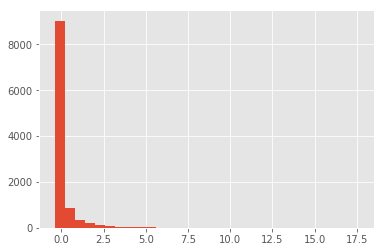

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')
imdb_train_X['ratingCount'].hist(bins=30)
plt.show()

In [20]:
from sklearn.preprocessing import PowerTransformer
from preprocessing_utils import NumericalFeatureCombinator

imdb_train_X, imdb_train_y = separate_features_targets(imdb_train)
imdb_train_X = NumericalFeatureCombinator().fit_transform(imdb_train_X)

# apply a power transform to the features to make data more Gaussian-like
power_tr = PowerTransformer()
column_names = num_columns + comb_columns
num_df = power_tr.fit_transform(imdb_train_X[column_names])
num_df = pd.DataFrame(num_df, columns=column_names, index=imdb_train_X.index)
imdb_train_X[column_names] = num_df
imdb_train_X.describe()

,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,Action,...,SciFi,Short,Sport,TalkShow,Thriller,War,Western,totalNominations,winsPerNomination,reviewsPerRating
count,1.084000e+04,1.023400e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,1.084000e+04,10840.000000,...,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,10840.000000,1.084000e+04,1.084000e+04,1.084000e+04
mean,-2.458058e-16,-2.332835e-16,-3.742804e-16,-6.489274e-17,-1.835350e-17,-1.560048e-16,1.658370e-16,4.326183e-17,2.720251e-17,0.164852,...,0.070387,0.034502,0.016513,0.012731,0.097878,0.034041,0.023063,3.015218e-17,-3.244637e-17,-1.599377e-16
std,1.000046e+00,1.000049e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,0.371064,...,0.255811,0.182523,0.127443,0.112115,0.297164,0.181342,0.150110,1.000046e+00,1.000046e+00,1.000046e+00
min,-2.083127e+00,-3.278434e+00,-2.349276e+00,-8.627894e-01,-7.845463e-01,-1.315065e+00,-1.139373e+00,-1.701494e+00,-1.997639e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.912043e-01,-8.655922e-01,-1.455124e+00
25%,-6.972621e-01,-3.076053e-01,-8.035667e-01,-8.627894e-01,-7.845463e-01,-1.315065e+00,-1.139373e+00,-7.400055e-01,-5.648305e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.912043e-01,-8.655922e-01,-7.669292e-01
50%,2.503510e-02,1.424387e-01,2.422585e-01,-8.627894e-01,-7.845463e-01,1.420594e-01,9.093313e-02,7.723046e-02,-5.648305e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-8.912043e-01,-8.655922e-01,-1.761950e-01
75%,7.254711e-01,4.965321e-01,8.146008e-01,1.049733e+00,1.143430e+00,7.946631e-01,8.698271e-01,7.090311e-01,9.425104e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.031765e+00,1.065361e+00,6.891157e-01
max,2.842944e+00,1.325225e+01,1.501359e+00,1.891223e+00,1.811441e+00,3.453386e+00,2.254324e+00,3.106809e+00,9.425104e-01,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.913549e+00,1.633276e+00,2.219125e+00


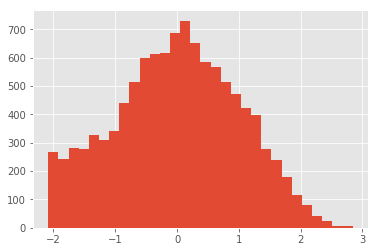

In [21]:
imdb_train_X['ratingCount'].hist(bins=30)
plt.show()

In [22]:
from preprocessing_utils import DataFrameColumnTransformer

col_tr = DataFrameColumnTransformer([
    ('drop', 'drop', nominal_columns),
    ('std_num', StandardScaler(), num_columns),
    ('onehot_type', OneHotEncoder(), ['type']),
], remainder='passthrough')

imdb_train_X, imdb_train_y = separate_features_targets(imdb_train)
col_tr.fit_transform(imdb_train_X).head()

,ratingCount,duration,year,nrOfWins,nrOfNominations,nrOfPhotos,nrOfNewsArticles,nrOfUserReviews,nrOfGenre,type_game,...,News,RealityTV,Romance,SciFi,Short,Sport,TalkShow,Thriller,War,Western
index,,,,,,,,,,,,,,,,,,,,,
11613,0.577001,0.234374,0.112606,0.060909,0.351781,0.181851,-0.099161,0.205206,-0.375883,0.0,...,0,0,0,0,0,0,0,0,0,0
12627,-0.388230,-0.036881,0.382972,-0.348804,-0.286663,-0.109517,-0.251655,-0.430247,0.884814,0.0,...,0,0,0,0,0,0,0,0,0,0
2775,-0.144287,0.324792,0.112606,0.880334,0.003539,-0.211496,-0.104844,-0.180302,0.884814,0.0,...,0,0,1,0,0,0,0,0,0,0
470,-0.401283,0.030933,-0.247881,-0.348804,-0.286663,-0.371748,-0.253549,-0.468374,0.884814,0.0,...,0,0,0,0,0,0,0,1,0,0
11480,-0.324929,0.076142,0.022485,-0.143947,-0.228622,-0.226064,-0.247866,-0.256556,0.884814,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from preprocessing_utils import FeaturePreprocessor

imdb_train_X, imdb_train_y = separate_features_targets(imdb_train)
feature_preprocessor_std = FeaturePreprocessor(add_combinations=True, std_scale_num=True, onehot_type=True)
imdb_train_std_X = feature_preprocessor_std.fit_transform(imdb_train_X)
imdb_train_std_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 11613 to 14254
Data columns (total 44 columns):
ratingCount           10840 non-null float64
duration              10840 non-null float64
year                  10840 non-null float64
nrOfWins              10840 non-null float64
nrOfNominations       10840 non-null float64
nrOfPhotos            10840 non-null float64
nrOfNewsArticles      10840 non-null float64
nrOfUserReviews       10840 non-null float64
nrOfGenre             10840 non-null float64
totalNominations      10840 non-null float64
winsPerNomination     10840 non-null float64
reviewsPerRating      10840 non-null float64
type_game             10840 non-null float64
type_video.episode    10840 non-null float64
type_video.movie      10840 non-null float64
type_video.tv         10840 non-null float64
Action                10840 non-null int64
Adult                 10840 non-null int64
Adventure             10840 non-null int64
Animation             10840 non-null i

In [24]:
feature_preprocessor_power = FeaturePreprocessor(add_combinations=True, powertransform_num=True, onehot_type=True)
imdb_train_power_X = feature_preprocessor_power.fit_transform(imdb_train_X)
imdb_train_power_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 11613 to 14254
Data columns (total 44 columns):
ratingCount           10840 non-null float64
duration              10840 non-null float64
year                  10840 non-null float64
nrOfWins              10840 non-null float64
nrOfNominations       10840 non-null float64
nrOfPhotos            10840 non-null float64
nrOfNewsArticles      10840 non-null float64
nrOfUserReviews       10840 non-null float64
nrOfGenre             10840 non-null float64
totalNominations      10840 non-null float64
winsPerNomination     10840 non-null float64
reviewsPerRating      10840 non-null float64
type_game             10840 non-null float64
type_video.episode    10840 non-null float64
type_video.movie      10840 non-null float64
type_video.tv         10840 non-null float64
Action                10840 non-null int64
Adult                 10840 non-null int64
Adventure             10840 non-null int64
Animation             10840 non-null i